In [1]:
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 11.1 그래이던트 소실과 폭주
- activation function으로 sigmoid를 사용하는 것과 정규분포로 weight를 초기화 하면 출력의 분산이 커짐
- sigmoid의 양끝에선 그래디언트가 매우 작다

## 11.1 글로럿과 He 초기화

In [2]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [3]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal") # he 정규분포로 초기화

In [4]:
init = keras.initializers.VarianceScaling(scale=2., mode="fan_avg", distribution="uniform") # 균등분포 초기화
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

## 11.1.2 수렴하지 않는 활성화함수
- forward passing할때 activation function을 잘 선택해야한다.

In [5]:
# activation function 종류
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

그림 저장: elu_plot


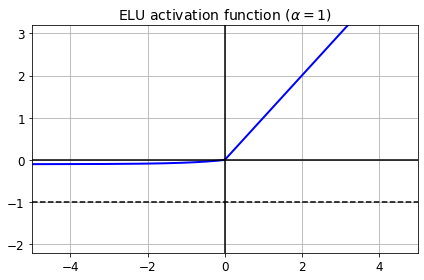

In [6]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)
z = np.linspace(-5, 5, 200)
    
plt.plot(z, elu(z,alpha=0.1), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("elu_plot")
plt.show()

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

### LeakyReLU

In [8]:

tf.random.set_seed(42)
np.random.seed(42)


model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.Dense(10, activation="softmax")
])

In [9]:

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [10]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 2s 1ms/step - loss: 1.2929 - accuracy: 0.6223 - val_loss: 0.8954 - val_accuracy: 0.7152
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.8001 - accuracy: 0.7361 - val_loss: 0.7162 - val_accuracy: 0.7638
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6843 - accuracy: 0.7717 - val_loss: 0.6450 - val_accuracy: 0.7890
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6237 - accuracy: 0.7943 - val_loss: 0.5914 - val_accuracy: 0.8056
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5845 - accuracy: 0.8073 - val_loss: 0.5592 - val_accuracy: 0.8196
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5563 - accuracy: 0.8156 - val_loss: 0.5358 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.5346 - accuracy: 0.8223 - val_loss: 0.5163 - val_accuracy:

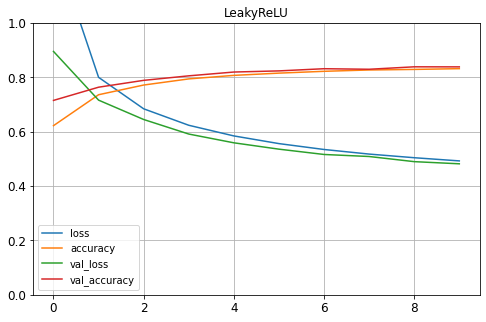

In [13]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.title("LeakyReLU")
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### 

In [15]:


model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))



Epoch 1/10
1719/1719 [==============================] - 2s 1ms/step - loss: 1.2815 - accuracy: 0.6111 - val_loss: 0.8755 - val_accuracy: 0.7188
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7943 - accuracy: 0.7432 - val_loss: 0.7115 - val_accuracy: 0.7636
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6844 - accuracy: 0.7786 - val_loss: 0.6412 - val_accuracy: 0.7888
Epoch 4/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.6241 - accuracy: 0.7973 - val_loss: 0.5877 - val_accuracy: 0.8082
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5849 - accuracy: 0.8077 - val_loss: 0.5555 - val_accuracy: 0.8172
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5567 - accuracy: 0.8146 - val_loss: 0.5317 - val_accuracy: 0.8230
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5351 - accuracy: 0.8203 - val_loss: 0.5120 - val_accuracy:

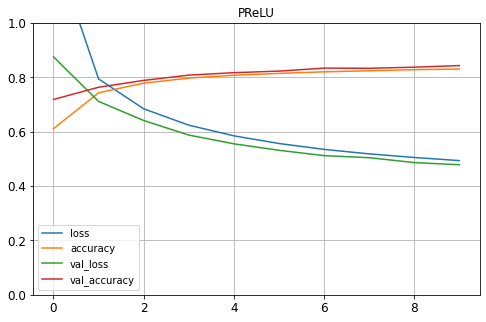

In [16]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.title("PReLU")
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [17]:

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))


model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [18]:
# input normalize
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds 
X_valid_scaled = (X_valid - pixel_means) / pixel_stds # 근데 validation set과 test set모두 X_train의 평균과 표준편차로 정규화해도 되는건가
X_test_scaled = (X_test-pixel_means) / pixel_stds

In [ ]:

history = model.fit(X_train_scaled, y_train, epochs=10,
                    validation_data=(X_valid_scaled, y_valid))

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.title("SELU")
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()